In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
df = pd.read_csv('/Users/ouardini/Downloads/data.csv')
df.shape

(534954, 6)

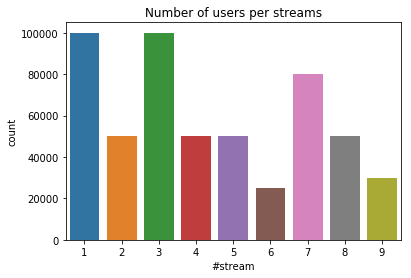

In [56]:
########### ANALYSIS OF THE DISTRIBUTION OF THE USERS ###############
#### Streams
plt.title('Number of users per streams')
ax = sns.countplot(x='#stream', data=df)
plt.show(ax)

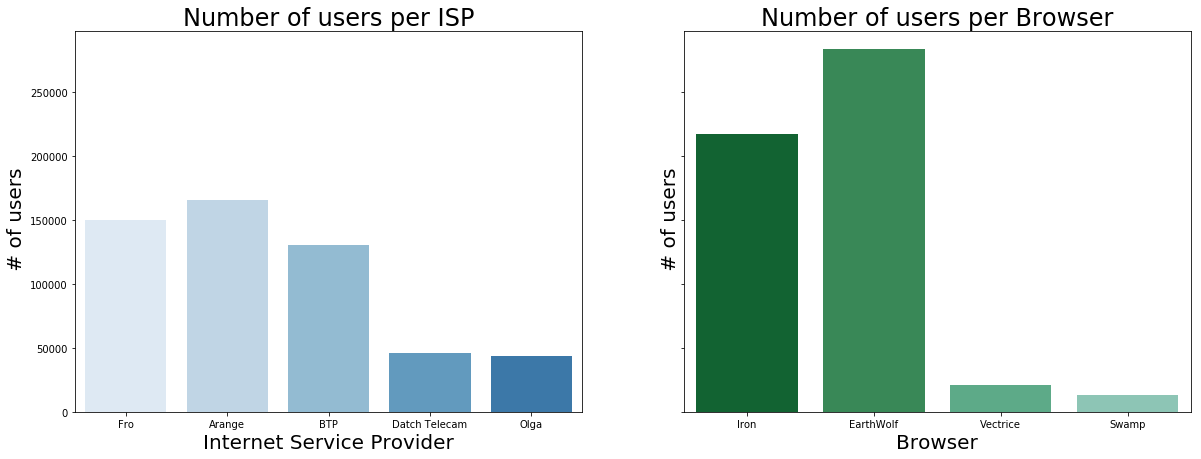

In [53]:
####### ISP and Browser ##########
fig0, (ax0,ax1) = plt.subplots(1, 2, sharex='col'
                               , sharey='row', figsize=(20, 7))
## ax0
plt.subplot(ax0)
ax0 = sns.countplot(x='isp', data=df,
                    palette=sns.color_palette("Blues"))
ax0.set_xlabel('Internet Service Provider', fontsize=20)
ax0.set_ylabel(' # of users', fontsize=20)
ax0.set_title('Number of users per ISP', fontsize=24)
plt.subplot(ax0)
## ax1
plt.subplot(ax1)
ax1 = sns.countplot(x='browser', data=df,
                    palette=sns.color_palette("BuGn_r"))
ax1.set_xlabel('Browser', fontsize=20)
ax1.set_ylabel(' # of users', fontsize=20)
ax1.set_title('Number of users per Browser', fontsize=24)

fig0

In [59]:
#### Connected and non Connected users 
total_users = float(df['#stream'].shape[0])
nb_connected = float(df[df['connected']==True].shape[0])
print('total number of users is:',total_users)
print('number of connected users', nb_connected,
     'which represents',(nb_connected/total_streams)*100
      ,'% of the total users')
print(df[df['connected']==False]['p2p'].mean())

('total number of users is:', 534954.0)
('number of connected users', 485753.0, 'which represents', 90.80276061119274, '% of the total users')
0.0


In [60]:
### users only downloading data through cdn
cdn = df[df['p2p']==0]
p2p = df[df['p2p']!=0]
print('percentage of users only downloading through cdn is',
      (float(cdn.shape[0])/total_streams)*100,'%')

('percentage of users only downloading through cdn is', 35.501557143231004, '%')


In [ ]:
###################### END OF GENERAL ANALYSIS ###################

In [ ]:
##################### FURHTER ANALYSIS ######################

In [64]:
# 1 -  Streams 
for s in range(1,10):
    stream = df[df['#stream']==s]
    print( 100*(float(stream[stream['connected']==True].shape[0])/
          float(stream.shape[0])),
          '%' )

(97.31400000000001, '%')
(96.804, '%')
(96.91499999999999, '%')
(96.548, '%')
(92.036, '%')
(97.004, '%')
(61.53125000000001, '%')
(97.454, '%')
(88.89296921946985, '%')


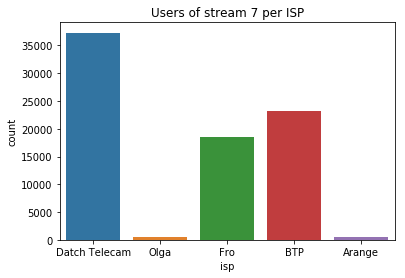

number of users downloading through p2p:
(0.4322625, '%')


In [72]:
stream7 = df[df['#stream']==7]
ax7 = sns.countplot(x='isp', data=stream7)
ax7.set_title('Users of stream 7 per ISP')
plt.show()
print('number of users downloading through p2p:')
print(float(stream7[stream7['p2p']==0].shape[0])/
      float(stream7.shape[0]),'%')

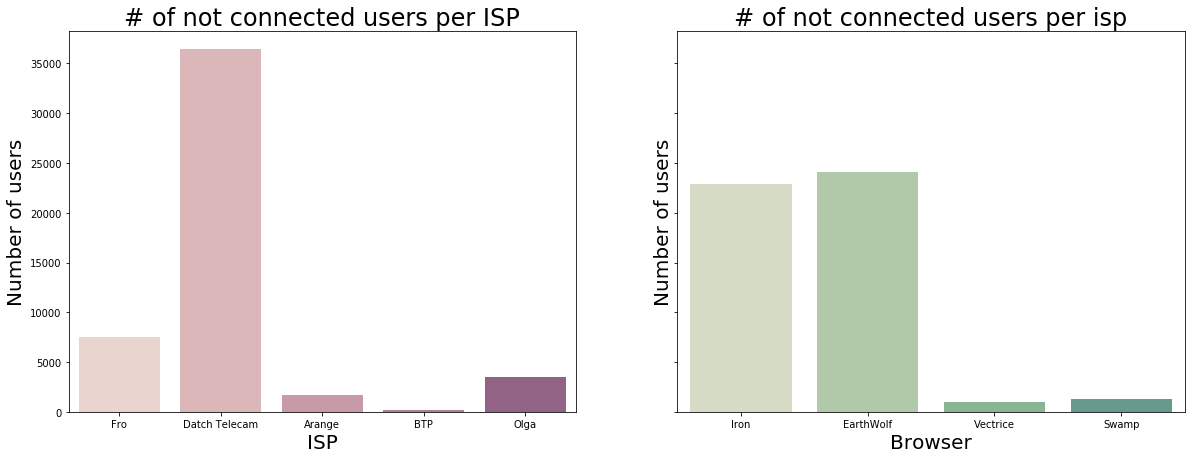

In [82]:
#2-  CONNECTION to streamroot's backend
connected = df[df['connected']==True]
not_connected = df[df['connected']==False]
fig1, (ax2,ax3) = plt.subplots(1, 2, sharex='col'
                               , sharey='row', figsize=(20, 7))
#ax2
plt.subplot(ax2)
ax2 = sns.countplot(x='isp', data=not_connected, 
                    palette=sns.cubehelix_palette(8))
ax2.set_title('# of not connected users per ISP', fontsize=24)
ax2.set_xlabel('ISP', fontsize=20)
ax2.set_ylabel('Number of users', fontsize=20)
#ax3
plt.subplot(ax3)
ax3 = sns.countplot(x='browser', data=not_connected, 
                    palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
ax3.set_title('# of not connected users per isp', fontsize=24)
ax3.set_xlabel('Browser', fontsize=20)
ax3.set_ylabel('Number of users', fontsize=20)
fig1

In [84]:
# 3- Data
df2 = df.drop(['p2p','cdn'], axis=1)
df2['data'] = df.p2p + df.cdn
## avrage size of downloaded data
print( float(df2[df2['connected']==False]['data'].mean())/10**6, 'Mo' )
print( float( float(df2[df2['connected']==True]['data'].mean())/10**6 ), 'Mo')

(6.276648863130251, 'Mo')
(20.138638477744614, 'Mo')


In [91]:
threshold = 10**(8) ### 100 Mo
#threshold2 = 10**(7)
p2p_large = p2p[p2p['cdn']+p2p['p2p']>threshold]
cdn_large = cdn[cdn['cdn']>threshold]
print(df['browser'].unique())
for x in df['browser'].unique():
    print(p2p_large[p2p_large['browser']==x].shape[0],
         cdn_large[cdn_large['browser']==x].shape[0])

['Iron' 'EarthWolf' 'Vectrice' 'Swamp']
(15700, 2976)
(28076, 2058)
(4, 793)
(174, 184)


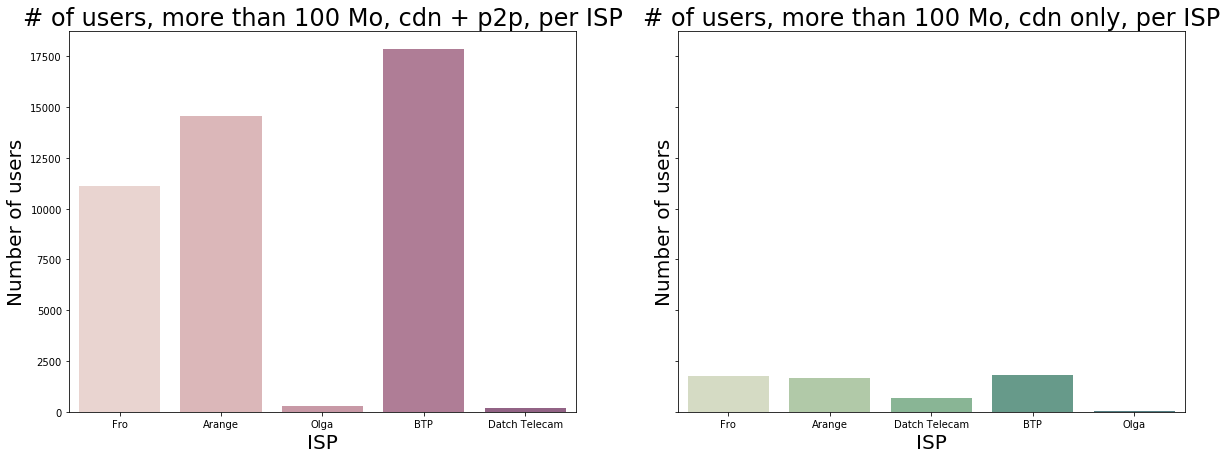

In [97]:
fig2, (ax4,ax5) = plt.subplots(1, 2, sharex='col'
                               , sharey='row', figsize=(20, 7))
#ax4
plt.subplot(ax4)
ax4 = sns.countplot(x='isp', data=p2p_large, 
                    palette=sns.cubehelix_palette(8))
ax4.set_title('# of users, more than 100 Mo, cdn + p2p, per ISP',
              fontsize=24)
ax4.set_xlabel('ISP', fontsize=20)
ax4.set_ylabel('Number of users', fontsize=20)
#ax5
plt.subplot(ax5)
ax5 = sns.countplot(x='isp', data=cdn_large, 
                    palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
ax5.set_title('# of users, more than 100 Mo, cdn only, per ISP'
              , fontsize=24)
ax5.set_xlabel('ISP', fontsize=20)
ax5.set_ylabel('Number of users', fontsize=20)
fig2

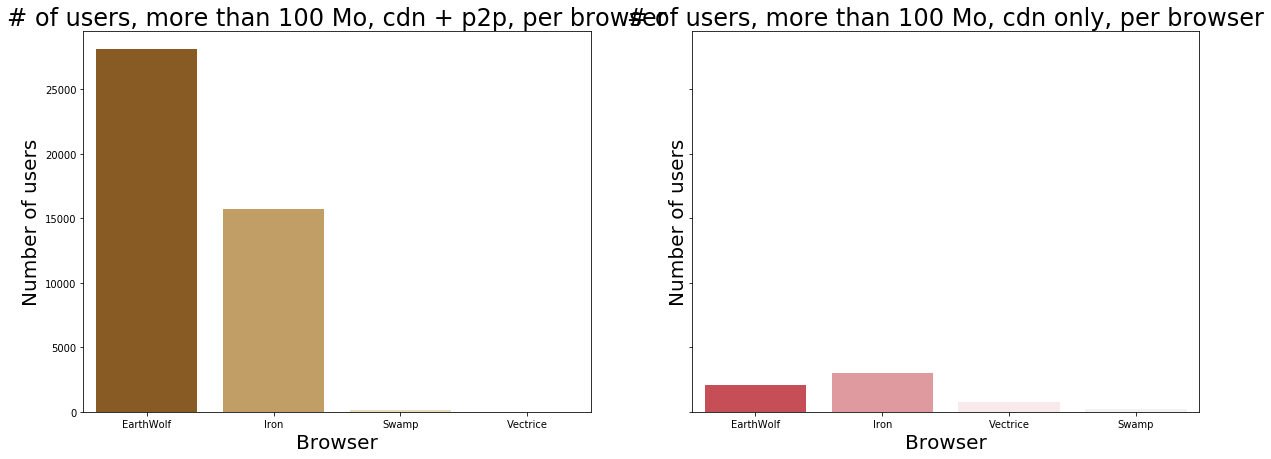

In [109]:
fig3, (ax6,ax7) = plt.subplots(1, 2, sharex='col'
                               , sharey='row', figsize=(20, 7))
#ax4
plt.subplot(ax6)
ax6 = sns.countplot(x='browser', data=p2p_large, 
                    palette=sns.color_palette("BrBG", 7))
ax6.set_title('# of users, more than 100 Mo, cdn + p2p, per browser',
              fontsize=24)
ax6.set_xlabel('Browser', fontsize=20)
ax6.set_ylabel('Number of users', fontsize=20)
#ax5
plt.subplot(ax7)
ax7 = sns.countplot(x='browser', data=cdn_large, 
                    palette=sns.diverging_palette(10, 220, sep=80, n=7))
ax7.set_title('# of users, more than 100 Mo, cdn only, per browser'
              , fontsize=24)
ax7.set_xlabel('Browser', fontsize=20)
ax7.set_ylabel('Number of users', fontsize=20)

fig3